In [94]:
import pandas as pd
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [96]:
data_folder = Path("/content/drive/MyDrive/Airline1")

In [97]:
aa_otp = pd.read_csv(data_folder/"AA_OTP.csv")
alaska_otp = pd.read_csv(data_folder/"Alaska_OTP.csv")
delta_otp = pd.read_csv(data_folder/"Delta_OTP.csv")
sw_otp = pd.read_csv(data_folder/"SouthWest_OTP.csv")
united_otp = pd.read_csv(data_folder/"United_OTP.csv")
aa = pd.read_excel(data_folder/"AA.xlsx").transpose()
alaska = pd.read_excel(data_folder/"Alaska.xlsx").transpose()
delta = pd.read_excel(data_folder/"Delta.xlsx").transpose()
sw = pd.read_excel(data_folder/"SouthWest.xlsx").transpose()
united = pd.read_excel(data_folder/"United.xlsx").transpose()

In [98]:
def rmvSpaceFromCol(df):
    newCol = []
    cols = df.columns
    for col in cols:
        newCol.append(re.sub(r'\s+','',col))
    df.columns = newCol

In [99]:
rmvSpaceFromCol(aa_otp)
rmvSpaceFromCol(alaska_otp)
rmvSpaceFromCol(delta_otp)
rmvSpaceFromCol(sw_otp)
rmvSpaceFromCol(united_otp)

In [100]:
aa_otp.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [101]:
aa_otp = aa_otp.iloc[:,[0,6,7]]
alaska_otp = alaska_otp.iloc[:,[0,6,7]]
delta_otp = delta_otp.iloc[:,[0,6,7]]
sw_otp = sw_otp.iloc[:,[0,6,7]]
united_otp = united_otp.iloc[:,[0,6,7]]

In [102]:
print(aa_otp.isna().sum())
print(alaska_otp.isna().sum())
print(delta_otp.isna().sum())
print(sw_otp.isna().sum())
print(united_otp.isna().sum())

year            0
arr_flights     4
arr_del15      11
dtype: int64
year           0
arr_flights    1
arr_del15      2
dtype: int64
year            0
arr_flights    53
arr_del15      63
dtype: int64
year           0
arr_flights    0
arr_del15      0
dtype: int64
year            0
arr_flights    22
arr_del15      35
dtype: int64


In [103]:
%%capture
aa_otp.fillna(aa_otp.median(), inplace=True)
alaska_otp.fillna(alaska_otp.median(), inplace=True)
delta_otp.fillna(delta_otp.median(), inplace=True)
sw_otp.fillna(sw_otp.median(), inplace=True)
united_otp.fillna(united_otp.median(), inplace=True)

In [104]:
aa_otp = aa_otp.groupby('year').sum()
alaska_otp = alaska_otp.groupby('year').sum()
delta_otp = delta_otp.groupby('year').sum()
sw_otp = sw_otp.groupby('year').sum()
united_otp = united_otp.groupby('year').sum()

In [105]:
aa_otp['airline'] = "aa"
alaska_otp['airline'] = "alaska"
delta_otp['airline'] = "delta"
sw_otp['airline'] = "sw"
united_otp['airline'] = "united"

In [106]:
otp = pd.concat([aa_otp, alaska_otp, delta_otp, sw_otp, united_otp])
otp['pc_delay'] = otp['arr_del15'] / otp['arr_flights'] * 100
pc_delay = otp['pc_delay']
otp = otp.drop(columns=['pc_delay'])
otp.insert(loc=2, column='pc_delay', value = pc_delay)
otp.reset_index(inplace=True)

In [107]:
otp = otp[(otp['year'] >= 2006) & (otp['year'] <= 2020)]
otp.columns = ['year','number_of_flights','number_of_delays','percent_delays','airline']

In [108]:
def clean_xlsx(df):
    df = df.reset_index(drop=True)
    df = df.iloc[13:,[1,146,148,159,189]]
    df.columns = ['year','total_fleet_cost','pilot_cost','maintenance_cost','ASM']
    df['total_fleet_cost'] = df['total_fleet_cost'] * 1000
    df['pilot_cost'] = df['pilot_cost'] * 1000
    df['maintenance_cost'] = df['maintenance_cost'] * 1000
    return df

In [109]:
aa = clean_xlsx(aa)
alaska = clean_xlsx(alaska)
delta = clean_xlsx(delta)
sw = clean_xlsx(sw)
united = clean_xlsx(united)

In [110]:
aa['airline'] = "aa"
alaska['airline'] = "alaska"
delta['airline'] = "delta"
sw['airline'] = "sw"
united['airline'] = "united"

In [111]:
cost = pd.concat([aa, alaska, delta, sw, united])

In [112]:
otp = otp.reset_index(drop=True)
cost = cost.reset_index(drop=True)

In [113]:
df = pd.merge(left=cost, right=otp, how="inner", on=['year','airline'])

In [114]:
df['CASM_Total'] = df['total_fleet_cost'] / df['ASM']
df['CASM_Pilot'] = df['pilot_cost'] / df['ASM']
df['CASM_Maintenance'] = df['maintenance_cost'] / df['ASM']

In [115]:
df

,year,total_fleet_cost,pilot_cost,maintenance_cost,ASM,airline,number_of_flights,number_of_delays,percent_delays,CASM_Total,CASM_Pilot,CASM_Maintenance
0,2006,10986061000,1908144000,1976929000,174026191439,aa,643597.0,145563.0,22.617104,0.063129,0.010965,0.01136
1,2007,11210772000,1881909000,1961909000,169910784220,aa,633857.0,178129.0,28.102395,0.06598,0.011076,0.011547
2,2008,13441293000,1824261000,2186197000,163537180890,aa,604885.0,163112.0,26.965787,0.082191,0.011155,0.013368
3,2009,10247163000,1760092000,2226856000,151779066994,aa,551597.0,114591.0,20.774406,0.067514,0.011596,0.014672
4,2010,11146543000,1773128000,2324637000,153245600723,aa,540963.0,99108.0,18.320661,0.072736,0.01157,0.015169
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2016,12934689000,3400886000,2724747000,224652629285,united,545190.0,92865.0,17.033511,0.057576,0.015138,0.012129
71,2017,14380126000,3621185000,2988232000,234546881195,united,584481.0,97603.0,16.699089,0.06131,0.015439,0.01274
72,2018,16450649000,3967806000,2929919000,244770592714,united,621565.0,119668.0,19.252693,0.067208,0.01621,0.01197
73,2019,16326691000,4193601000,2913522000,253254572206,united,626033.0,132160.0,21.110708,0.064468,0.016559,0.011504


In [116]:
df['otp_change'] = df.groupby(['airline'])['number_of_delays'].pct_change()
df['p_change'] = df.groupby(['airline'])['CASM_Pilot'].pct_change()
df['m_change'] = df.groupby(['airline'])['CASM_Maintenance'].pct_change()

In [117]:
df

,year,total_fleet_cost,pilot_cost,maintenance_cost,ASM,airline,number_of_flights,number_of_delays,percent_delays,CASM_Total,CASM_Pilot,CASM_Maintenance,otp_change,p_change,m_change
0,2006,10986061000,1908144000,1976929000,174026191439,aa,643597.0,145563.0,22.617104,0.063129,0.010965,0.01136,NaN,NaN,NaN
1,2007,11210772000,1881909000,1961909000,169910784220,aa,633857.0,178129.0,28.102395,0.06598,0.011076,0.011547,0.223724,0.010139,0.016439
2,2008,13441293000,1824261000,2186197000,163537180890,aa,604885.0,163112.0,26.965787,0.082191,0.011155,0.013368,-0.084304,0.007147,0.15775
3,2009,10247163000,1760092000,2226856000,151779066994,aa,551597.0,114591.0,20.774406,0.067514,0.011596,0.014672,-0.297470,0.039568,0.097507
4,2010,11146543000,1773128000,2324637000,153245600723,aa,540963.0,99108.0,18.320661,0.072736,0.01157,0.015169,-0.135115,-0.002234,0.03392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2016,12934689000,3400886000,2724747000,224652629285,united,545190.0,92865.0,17.033511,0.057576,0.015138,0.012129,-0.113427,0.126229,0.021891
71,2017,14380126000,3621185000,2988232000,234546881195,united,584481.0,97603.0,16.699089,0.06131,0.015439,0.01274,0.051020,0.01986,0.050437
72,2018,16450649000,3967806000,2929919000,244770592714,united,621565.0,119668.0,19.252693,0.067208,0.01621,0.01197,0.226069,0.049954,-0.060468
73,2019,16326691000,4193601000,2913522000,253254572206,united,626033.0,132160.0,21.110708,0.064468,0.016559,0.011504,0.104389,0.021501,-0.038909


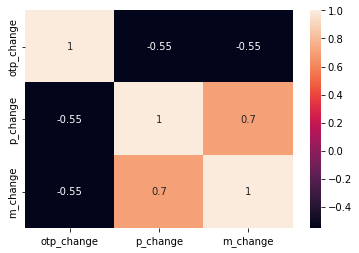

In [118]:
#correlation matrix
df_small = df.iloc[:, 12:15]
df_small = df_small.astype(float)

matrix = df_small.corr()

sns.heatmap(matrix, annot = True)
plt.show()